In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt
%matplotlib inline

### Load the data

In [29]:
data = pd.read_csv("A:\dataset\SAPStock\SAP Historical Data.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 27, 2018",111.35,111.38,111.56,110.56,946.45K,1.34%
1,"Apr 26, 2018",109.88,109.33,110.22,109.15,1.80M,0.91%
2,"Apr 25, 2018",108.89,108.58,109.00,107.61,1.01M,0.36%
3,"Apr 24, 2018",108.50,110.59,111.13,108.50,3.04M,2.38%
4,"Apr 23, 2018",105.98,106.45,106.72,105.57,1.18M,-0.02%


In [182]:
data.reset_index(drop=True)
target_vairable = data['Price']


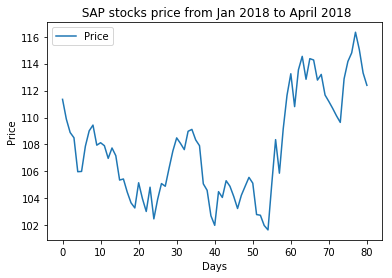

In [167]:
plt.title(' SAP stocks price from Jan 2018 to April 2018')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(target_variable)
plt.legend()
plt.show()

## There are 81 rows that is roughly 3 month's data

### Data Pre-processing

### Feature scaling here, using Standardization because it is less affected by outliers

In [168]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))


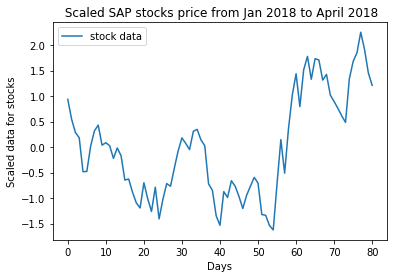

In [169]:
plt.title(' Scaled SAP stocks price from Jan 2018 to April 2018')
plt.xlabel('Days')
plt.ylabel('Scaled data for stocks', )
plt.plot(scaled_data, label = 'stock data')
plt.legend()
plt.show()

In [60]:
data['Vol.'] = (data['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * data['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False).replace(['K','M'], [10**3, 10**6]).astype(int))

In [114]:
X = pd.DataFrame(scaler.fit_transform(data[['Open', 'High', 'Low', 'Vol.']]))
X.rename(columns ={0:'open', 1:'High', 2:'Low', 3:'Vol'}, inplace = True)
y = scaled_data
data.index[0]

'Apr 27, 2018'

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 22)


In [128]:
linear = LinearRegression()
linear.fit(X_train, y_train)
ypred = linear.predict(X_test)
mean_squared_error(y_test, ypred)

0.017664462205627895

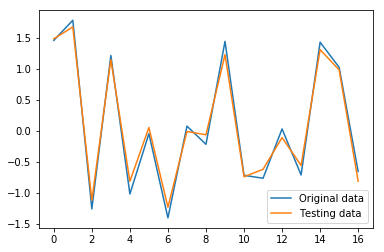

In [141]:

plt.plot(y_test, label='Original data')
#plt.plot(y_train, label='Training data')
plt.plot(ypred, label='Testing data')
plt.legend()
plt.show()

In [144]:
X = pd.DataFrame(data[['Open', 'High', 'Low', 'Vol.']])
y = data['Price']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 22)


In [147]:
linear = LinearRegression()
linear.fit(X_train, y_train)
ypred = linear.predict(X_test)
mean_squared_error(y_test, ypred)

0.25300024174931951